In [1]:
#Dataset : Bank
#GOAL : Predicting Deposit Subscription:
#Goal is to predict whether a client will subscribe to a deposit.

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt




In [2]:
bank = pd.read_csv('bank.csv')
bank.head(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:


bank.shape

(45211, 17)

In [4]:
bank.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
bank.poutcome.value_counts() #to count unique values

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [6]:
bank.describe() #For each numerical column it computes statistics.

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
bank.info() #provides information such as the index dtype, column data types, non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


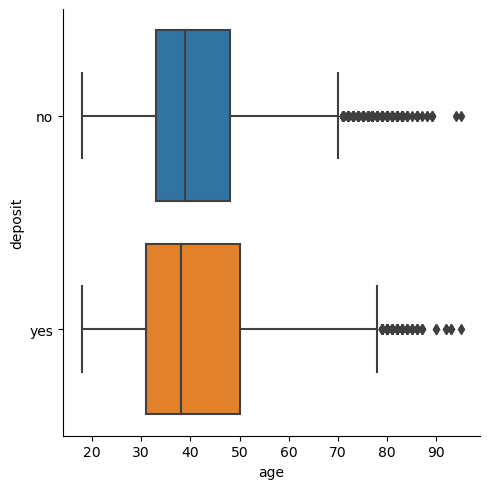

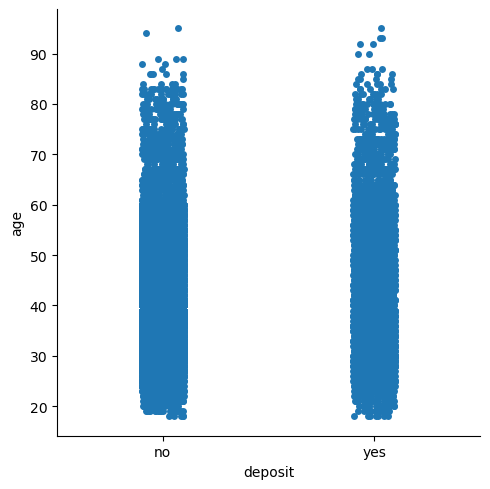

In [8]:
#boxplot

sns.catplot(y="deposit", x="age", kind="box", data=bank)

#catplot

sns.catplot(x='deposit', y='age',data=bank)



C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


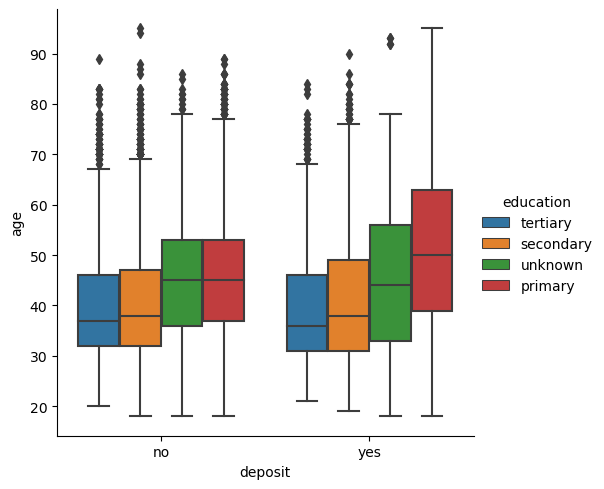

In [9]:
# hue = "education"
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.catplot(x="deposit", y="age", hue="education", kind="box", data=bank) #to differentiate the data points based on another categorical variable.

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


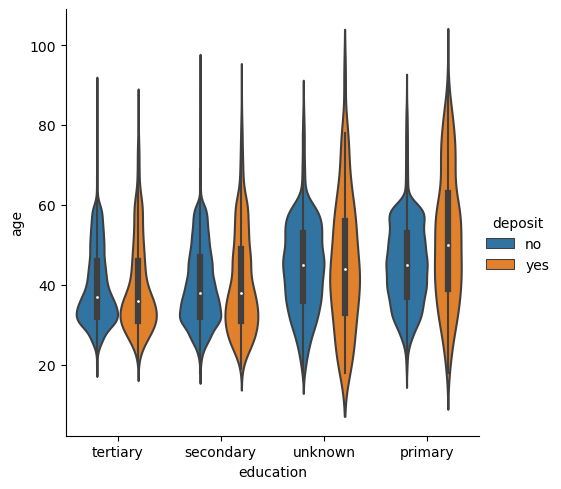

In [10]:
sns.catplot(x="education", y="age", hue="deposit",
            kind="violin", data=bank)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


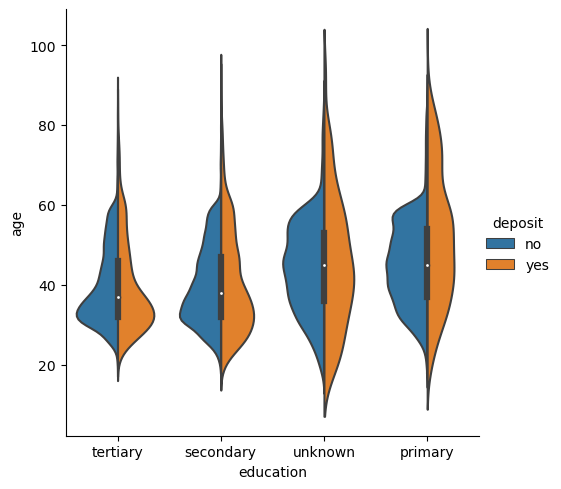

In [11]:
sns.catplot(x="education", y="age", hue="deposit",
            kind="violin",split=True, data=bank)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


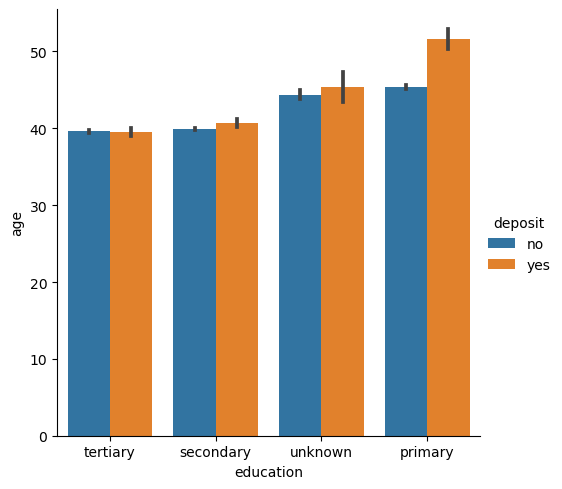

In [12]:
sns.catplot(x="education", y="age", hue="deposit", kind="bar", data=bank)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


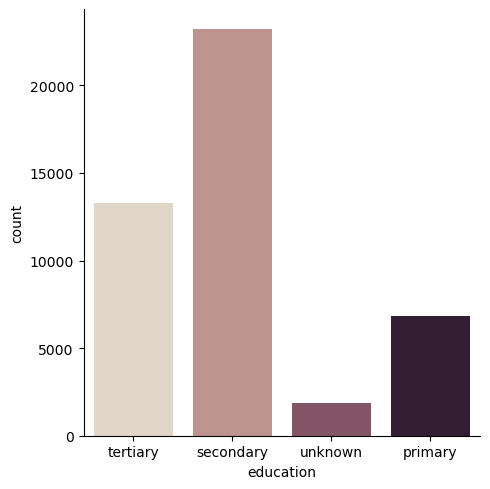

In [13]:
sns.catplot(x="education", kind="count", palette="ch:.25", data=bank)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


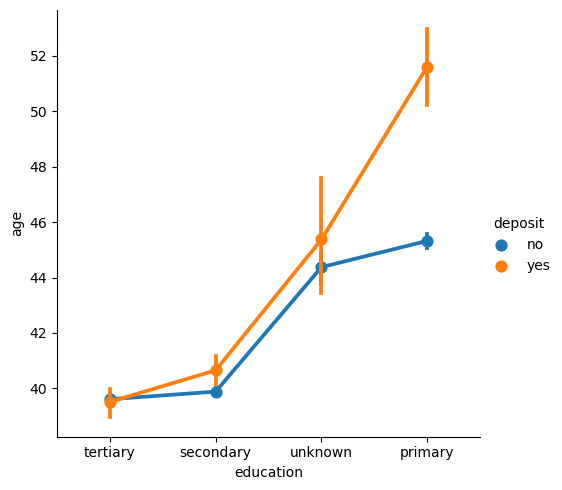

In [14]:
sns.catplot(x="education", y="age", hue="deposit", kind="point", data=bank)

<Axes: xlabel='deposit', ylabel='age'>

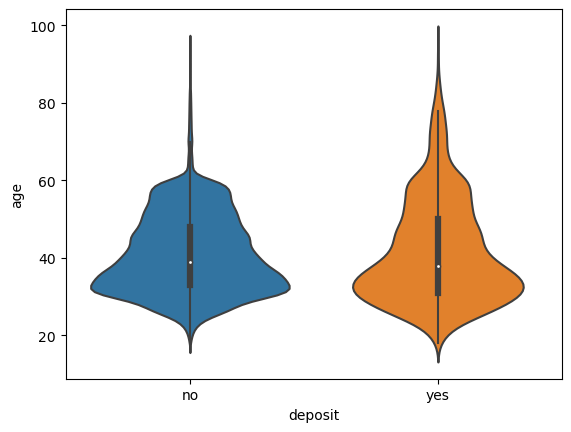

In [15]:
sns.violinplot(x=bank.deposit, y=bank.age)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split

x = bank.drop(["deposit"], axis=1) # axis=1 for selecting columns instead of rows # Features
y = bank["deposit"] # Target variable

X_encoded = pd.get_dummies(x)

#Hold-out method (80/20)
x_train, x_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0) # 0.2 for 80%-20% test-train cut.
# random_state=0 to ensure that the data split is the same each time you run the code.

model = DecisionTreeClassifier()

model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

print("Confusion Matrix:",confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:\n", accuracy)
print("Classification Report of Decision Tree Classifier:\n", classification_report(y_test, y_pred))


Confusion Matrix: [[7384  596]
 [ 572  491]]
Accuracy:
 0.8708393232334403
Classification Report of Decision Tree Classifier:
               precision    recall  f1-score   support

          no       0.93      0.93      0.93      7980
         yes       0.45      0.46      0.46      1063

    accuracy                           0.87      9043
   macro avg       0.69      0.69      0.69      9043
weighted avg       0.87      0.87      0.87      9043



In [17]:
x_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
13932,57,658,10,724,1,-1,0,True,False,False,...,False,False,False,False,False,False,False,False,False,True
9894,37,1699,9,63,1,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
39946,35,2823,2,102,4,96,2,False,False,False,...,True,False,False,False,False,False,True,False,False,False
9217,35,214,5,247,1,-1,0,True,False,False,...,True,False,False,False,False,False,False,False,False,True
4124,38,323,19,138,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [18]:
x_test.shape


(9043, 51)

In [19]:
x_test.head()


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
14001,37,1403,10,91,15,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
32046,36,-253,14,1073,1,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
13318,47,-406,8,243,5,-1,0,False,True,False,...,False,False,False,False,False,False,False,False,False,True
42991,57,501,11,105,7,188,2,False,False,False,...,False,False,False,False,False,False,True,False,False,False
14237,33,-406,14,332,2,-1,0,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [20]:
y_train.shape

(36168,)

In [21]:
y_test.head(10)


14001     no
32046    yes
13318     no
42991     no
14237     no
14360     no
36635     no
37042     no
25994     no
14555     no
Name: deposit, dtype: object

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd

#Decision Tree Classifier

model = DecisionTreeClassifier()

model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)


print("Confusion Matrix:",confusion_matrix(y_test, y_pred))

decision_tree_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:\n", decision_tree_accuracy)
print("Classification Report of Decision Tree Classifier:\n", classification_report(y_test, y_pred))


Confusion Matrix: [[7369  611]
 [ 571  492]]
Accuracy:
 0.8692911644365808
Classification Report of Decision Tree Classifier:
               precision    recall  f1-score   support

          no       0.93      0.92      0.93      7980
         yes       0.45      0.46      0.45      1063

    accuracy                           0.87      9043
   macro avg       0.69      0.69      0.69      9043
weighted avg       0.87      0.87      0.87      9043



In [23]:
#Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))

random_forest_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:\n", random_forest_accuracy)
print("Classification Report of Random Forest classifier:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[7743  237]
 [ 638  425]]
Accuracy:
 0.9032400751962845
Classification Report of Random Forest classifier:
               precision    recall  f1-score   support

          no       0.92      0.97      0.95      7980
         yes       0.64      0.40      0.49      1063

    accuracy                           0.90      9043
   macro avg       0.78      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



In [24]:
#SVM classifier

from sklearn.svm import SVC

model = SVC()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))

svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:\n", svm_accuracy)
print("Classification Report of SVM :\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[7972    8]
 [1052   11]]
Accuracy:
 0.8827822625234988
Classification Report of SVM :
               precision    recall  f1-score   support

          no       0.88      1.00      0.94      7980
         yes       0.58      0.01      0.02      1063

    accuracy                           0.88      9043
   macro avg       0.73      0.50      0.48      9043
weighted avg       0.85      0.88      0.83      9043



In [25]:
#NaiveBayes Classifier

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))

nb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:\n", nb_accuracy)
print("Classification Report of NaiveBayes Classifier :\n", classification_report(y_test, y_pred))


Confusion Matrix :
 [[7147  833]
 [ 478  585]]
Accuracy:
 0.855025986951233
Classification Report of NaiveBayes Classifier :
               precision    recall  f1-score   support

          no       0.94      0.90      0.92      7980
         yes       0.41      0.55      0.47      1063

    accuracy                           0.86      9043
   macro avg       0.67      0.72      0.69      9043
weighted avg       0.88      0.86      0.86      9043



In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

logistic_regression_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:\n", logistic_regression_accuracy)
print("Classification Report of LogisticRegression :\n", classification_report(y_test, y_pred))


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
 [[7821  159]
 [ 856  207]]
Accuracy:
 0.8877584872276899
Classification Report of LogisticRegression :
               precision    recall  f1-score   support

          no       0.90      0.98      0.94      7980
         yes       0.57      0.19      0.29      1063

    accuracy                           0.89      9043
   macro avg       0.73      0.59      0.61      9043
weighted avg       0.86      0.89      0.86      9043



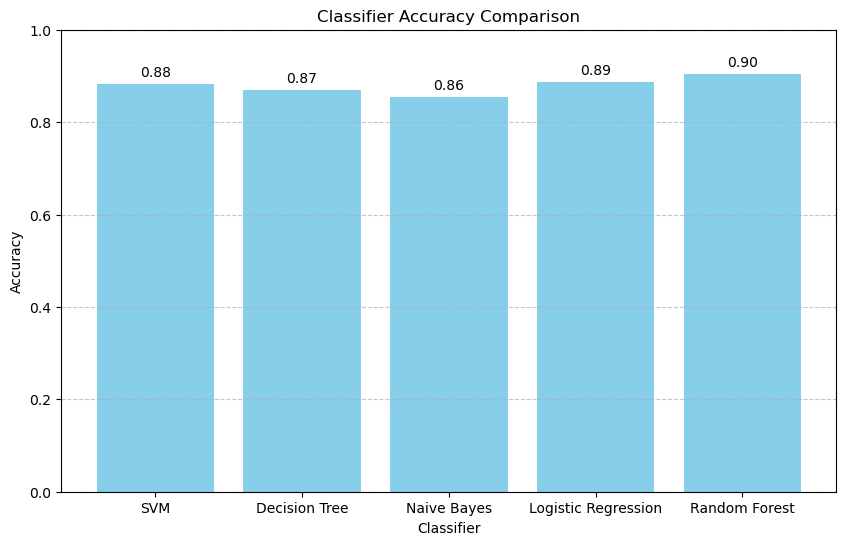

In [27]:
import matplotlib.pyplot as plt

# Accuracy scores for each classifier
accuracies = [svm_accuracy, decision_tree_accuracy, nb_accuracy, logistic_regression_accuracy, random_forest_accuracy]

# Classifier names
classifier_names = ["SVM", "Decision Tree",  "Naive Bayes", "Logistic Regression", "Random Forest"]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, accuracies, color='skyblue')
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Classifier Accuracy Comparison")
plt.ylim(0, 1)  # Set y-axis limits (0 to 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', va='bottom')

plt.show()
